In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

In [4]:
df = pd.read_csv('customer_booking.csv', encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [5]:
df.shape

(50000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [7]:
df_channel=pd.DataFrame(df.sales_channel.value_counts())
df_channel

,count
sales_channel,
Internet,44382
Mobile,5618


In [8]:
df_channel.rename(columns={'count':'total_count'},inplace=True)
df_channel.reset_index(inplace=True)
df_channel

,sales_channel,total_count
0,Internet,44382
1,Mobile,5618


In [9]:
pct_values = ((df_channel.total_count.values / df_channel.total_count.values.sum()) * 100).tolist()
pct_values = [round(x, 2) for x in pct_values]
df_channel['percentage'] = pct_values
df_channel

,sales_channel,total_count,percentage
0,Internet,44382,88.76
1,Mobile,5618,11.24


In [10]:
df_trip=pd.DataFrame(df.trip_type.value_counts())
df_trip.rename(columns={'count':'total_count'},inplace=True)
df_trip.reset_index(inplace=True)
pct_values = ((df_trip.total_count.values / df_trip.total_count.values.sum()) * 100).tolist()
pct_values = [round(x, 2) for x in pct_values]
df_trip['percentage'] = pct_values
df_trip

,trip_type,total_count,percentage
0,RoundTrip,49497,98.99
1,OneWay,387,0.77
2,CircleTrip,116,0.23


In [11]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


/Users/rakibulhasan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


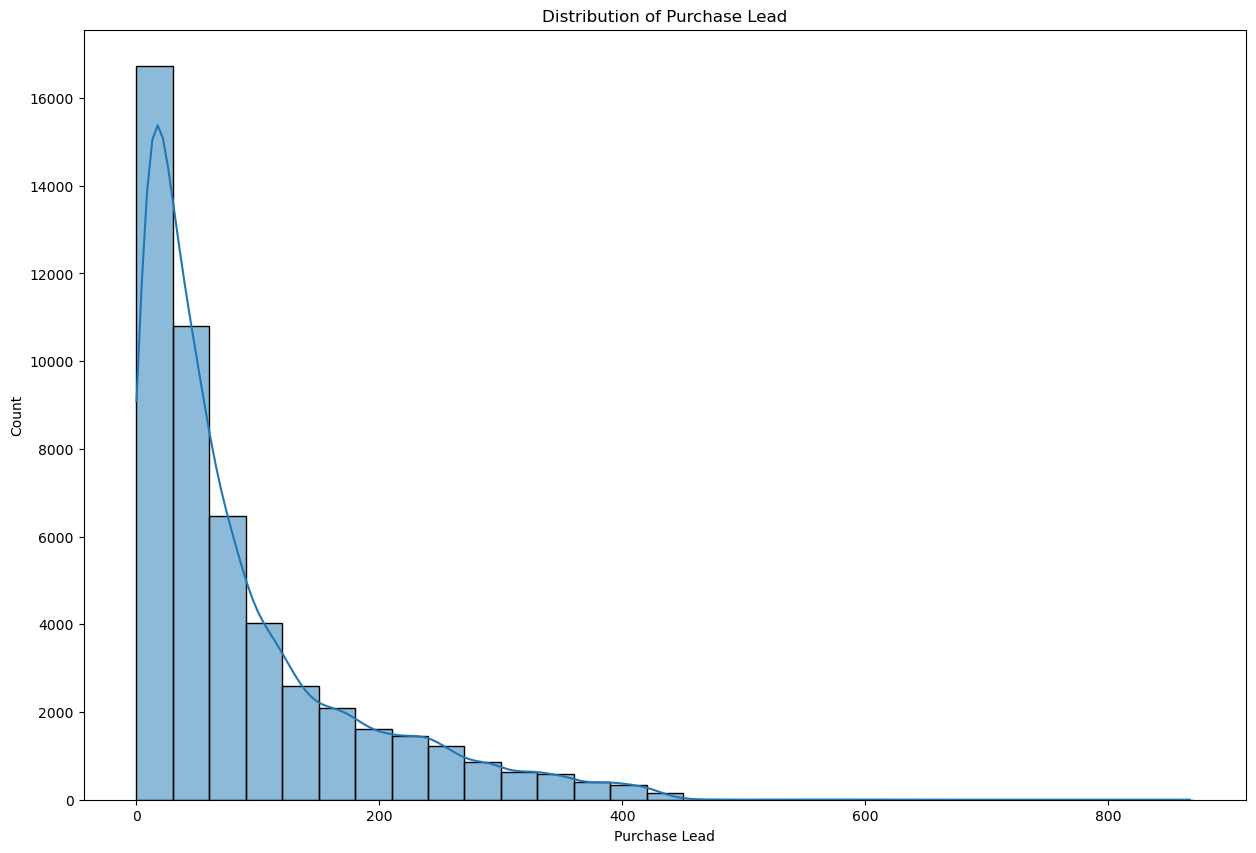

In [12]:
plt.figure(figsize=(15,10))
ax = sns.histplot(data=df, x='purchase_lead', binwidth=30, kde=True)

ax.set(xlabel='Purchase Lead', ylabel='Count')
ax.set_title('Distribution of Purchase Lead')
plt.show();


In [13]:
df_lengthofstay = pd.DataFrame(df.length_of_stay.value_counts())
df_lengthofstay = df_lengthofstay.head(20)
df_lengthofstay.rename(columns={'count':'count'},inplace=True)
df_lengthofstay.reset_index(inplace=True)
pct = ((df_lengthofstay['count'].values / df_lengthofstay['count'].values.sum()) * 100).tolist()
pct = [round(x, 2) for x in pct]
df_lengthofstay['percentage'] = pct
df_lengthofstay

,length_of_stay,count,percentage
0,6,7757,19.46
1,5,7286,18.28
2,4,5655,14.19
3,3,2839,7.12
4,17,1849,4.64
5,21,1392,3.49
6,18,1356,3.40
7,22,1285,3.22
8,20,1285,3.22
9,19,1253,3.14


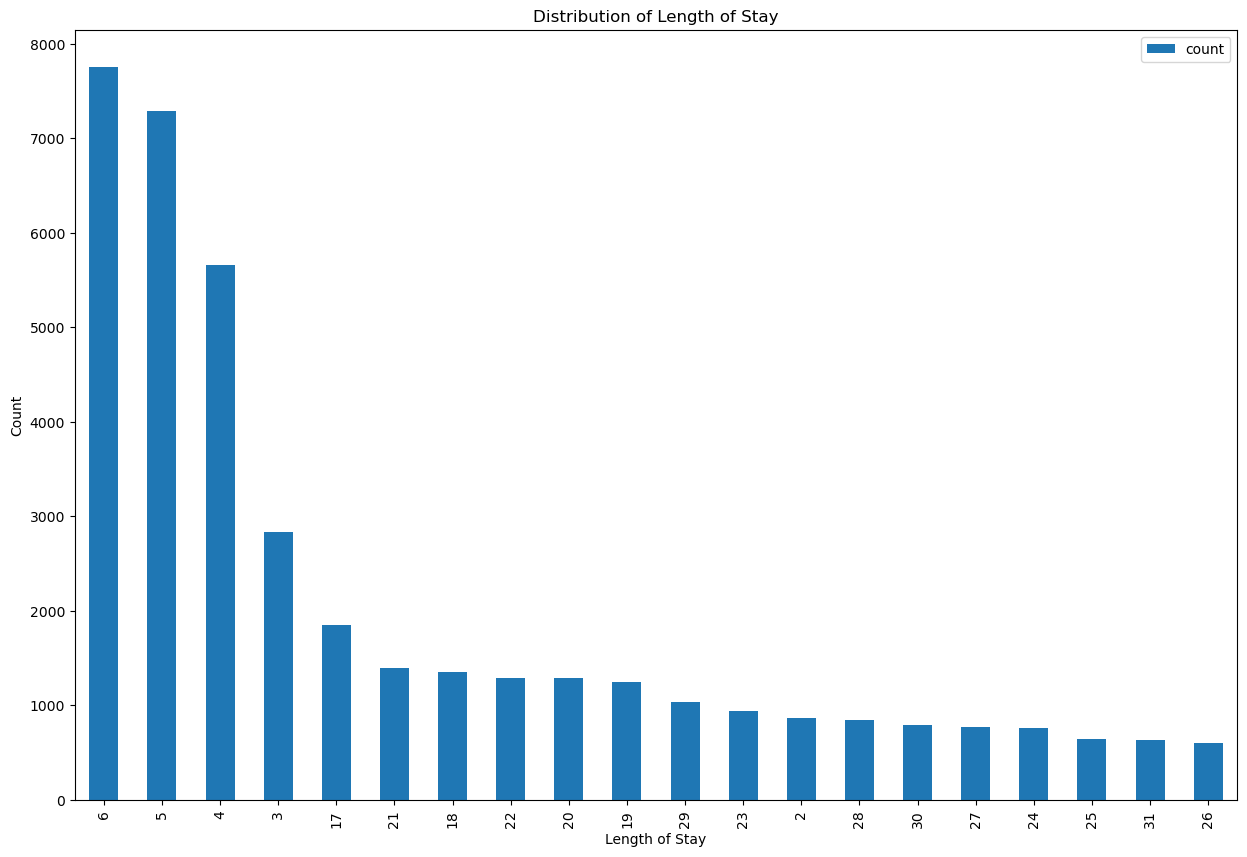

In [17]:
df_lengthofstay.plot(kind='bar', x='length_of_stay', y='count', figsize=(15,10));
plt.title('Distribution of Length of Stay')
plt.xlabel('Length of Stay')
plt.ylabel('Count')
plt.show();

In [39]:
df_lengthofstay.reset_index(inplace=True, drop=True)

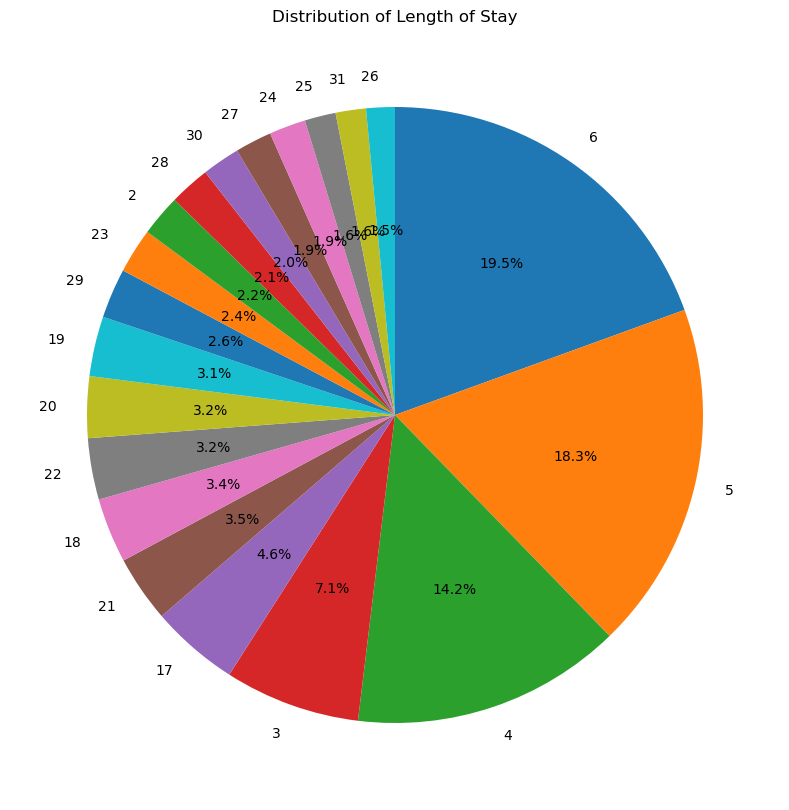

In [28]:
plt.figure(figsize=(15,10))
plt.title('Distribution of Length of Stay')
plt.pie(df_lengthofstay['count'], labels=df_lengthofstay['length_of_stay'], autopct='%1.1f%%', shadow=False, counterclock=False, startangle=90);

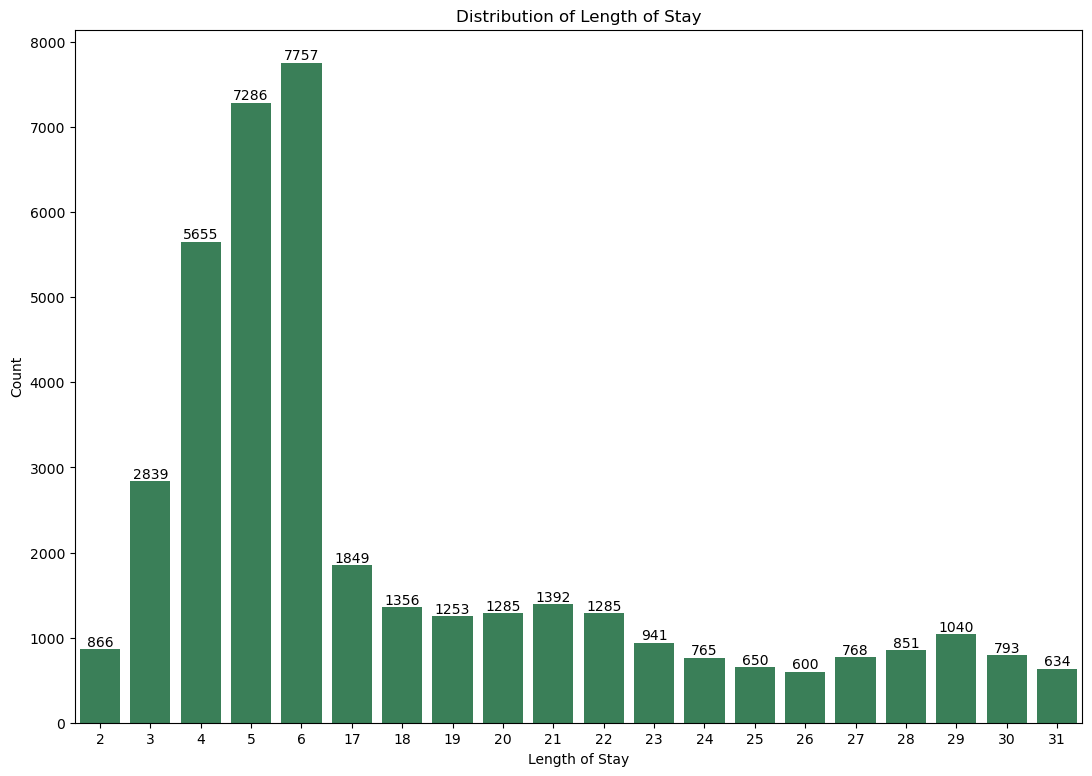

In [21]:
fig = plt.figure(figsize=(13,9))
ax = sns.barplot(x=df_lengthofstay['length_of_stay'], y=df_lengthofstay['count'], data=df_lengthofstay, errwidth=0, color='seagreen')

for container in ax.containers:
    ax.bar_label(container)
ax.set(xlabel='Length of Stay', ylabel='Count')
ax.set_title('Distribution of Length of Stay')

plt.show()